In [1]:
from hitters_data import *

In [2]:
df_train

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N,Salary
260,496.0,119.0,8.0,57.0,33.0,21.0,7.0,3358.0,882.0,36.0,365.0,280.0,165.0,155.0,371.0,29.0,1,1,1,875.0
92,317.0,78.0,7.0,35.0,35.0,32.0,1.0,317.0,78.0,7.0,35.0,35.0,32.0,45.0,122.0,26.0,0,0,0,70.0
137,343.0,103.0,6.0,48.0,36.0,40.0,15.0,4338.0,1193.0,70.0,581.0,421.0,325.0,211.0,56.0,13.0,0,0,0,430.0
90,314.0,83.0,13.0,39.0,46.0,16.0,5.0,1457.0,405.0,28.0,156.0,159.0,76.0,533.0,40.0,4.0,0,1,0,431.5
100,495.0,151.0,17.0,61.0,84.0,78.0,10.0,5624.0,1679.0,275.0,884.0,1015.0,709.0,1045.0,88.0,13.0,0,0,0,2460.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,522.0,140.0,16.0,73.0,77.0,60.0,4.0,730.0,185.0,22.0,93.0,106.0,86.0,1320.0,166.0,17.0,1,0,1,200.0
196,464.0,128.0,28.0,67.0,94.0,52.0,13.0,5829.0,1552.0,210.0,740.0,840.0,452.0,0.0,0.0,0.0,0,1,0,587.5
159,616.0,163.0,27.0,83.0,107.0,32.0,3.0,1437.0,377.0,65.0,181.0,227.0,82.0,110.0,308.0,15.0,0,1,0,200.0
17,190.0,46.0,2.0,24.0,8.0,15.0,5.0,479.0,102.0,5.0,65.0,23.0,39.0,102.0,177.0,16.0,0,1,0,175.0


In [3]:
# choose features
x_spline = df_train[['CRuns', 'Hits']]

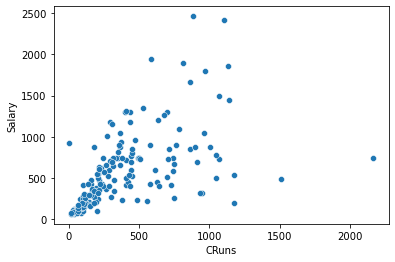

In [4]:
import seaborn as sns

sns.scatterplot(x='CRuns', y='Salary', data=df_train);

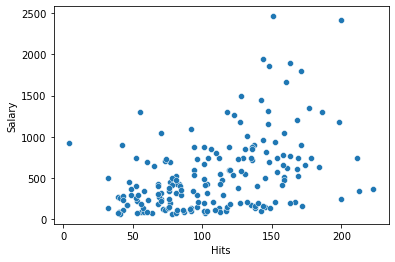

In [5]:
sns.scatterplot(x='Hits', y='Salary', data=df_train);

In [6]:
import statsmodels.api as sm
from statsmodels.gam.api import GLMGam, BSplines

# create basis spline
bs = BSplines(x_spline, df=[7, 7], degree=[3, 3])


In [7]:
import numpy as np

# we use a penalization weight of 1 for both features
alpha = np.array([1, 1])

In [8]:
# build model
gam_bs = GLMGam.from_formula('Salary ~ CRuns + Hits', 
                                data=df_train, 
                                smoother=bs, 
                                alpha=alpha)

In [9]:
# fit model
res_bs = gam_bs.fit()

# print results
print(res_bs.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Salary   No. Observations:                  184
Model:                         GLMGam   Df Residuals:                   171.00
Model Family:                Gaussian   Df Model:                        12.00
Link Function:               identity   Scale:                          90949.
Method:                         PIRLS   Log-Likelihood:                -1304.8
Date:                Fri, 14 Jan 2022   Deviance:                   1.5552e+07
Time:                        21:55:33   Pearson chi2:                 1.56e+07
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7307
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    823.4889    303.577      2.713      0.0

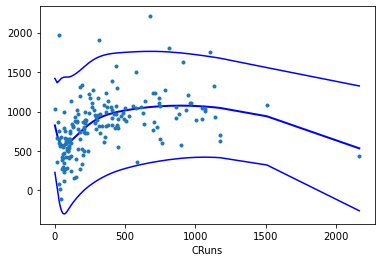

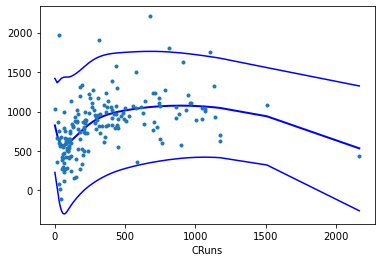

In [10]:
res_bs.plot_partial(0, cpr=True)

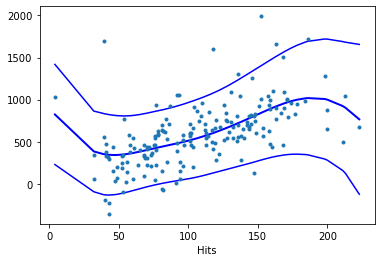

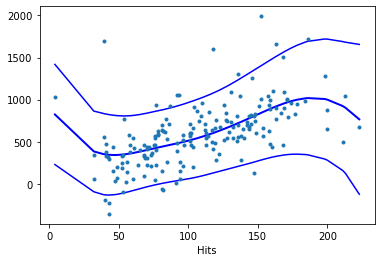

In [11]:
res_bs.plot_partial(1, cpr=True)

In [12]:
df_train['y_pred'] = res_bs.predict()

In [13]:
from statsmodels.tools.eval_measures import mse, rmse

# MSE
print('MSE:', mse(df_train['Salary'], df_train['y_pred']))
print('RMSE:', rmse(df_train['Salary'], df_train['y_pred']))

MSE: 84523.58788752233
RMSE: 290.72940664391405
